<a href="https://colab.research.google.com/github/nmuraro/entregables/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



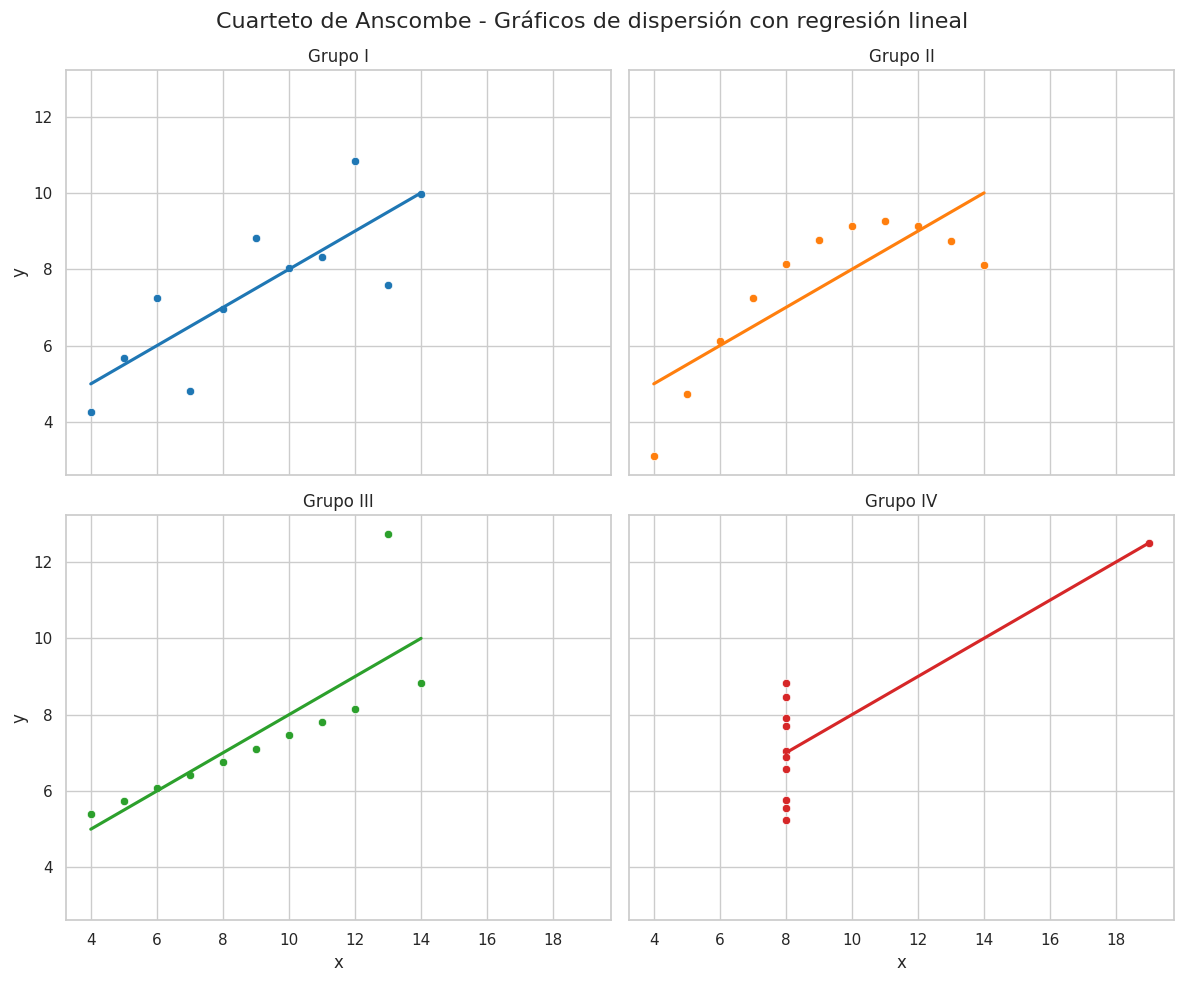

In [ ]:
# Crear gráfico de dispersión para cada grupo
sns.set(style="whitegrid")

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

# Flatten para iterar fácilmente
axes = axes.flatten()

# Colores opcionales por grupo
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Recorrer cada dataset
for i, group in enumerate(sorted(data['dataset'].unique())):
    subset = data[data['dataset'] == group]
    ax = axes[i]

    sns.scatterplot(data=subset, x='x', y='y', ax=ax, color=colors[i])
    ax.set_title(f'Grupo {group}')

    # Ajustar recta de regresión lineal
    sns.regplot(data=subset, x='x', y='y', ax=ax, scatter=False, color=colors[i], ci=None)

plt.suptitle('Cuarteto de Anscombe - Gráficos de dispersión con regresión lineal', fontsize=16)
plt.tight_layout()
plt.show()


**Respuesta:** Para el grupo I	claramente presenta una relación lineal. Ahora, para el segundo grupo, no es lineal, más bien tiene características parabólicas (el modelo lineal no representa bien la relación). Luego, para el tercer grupo	presenta una relación casi lineal, pero hay un outlier extremo que afecta la recta. Por último, el cuarto grupo tiene Todos los puntos verticales, excepto uno muy lejano.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [ ]:
# Agrupar por dataset y aplicar .describe() a las columnas numéricas
resumen = data.groupby("dataset").describe()

# Mostrar solo las columnas relevantes: x e y
resumen[['x', 'y']]

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Respuesta: Las estadísticas mean, std, min, max son idénticas o muy similares, pero los comportamientos de los datos son completamente distintos.

Esto demuestra que:

La visualización es indispensable antes de interpretar promedios o aplicar modelos.

Estadísticas sin gráficos pueden llevar a interpretaciones equivocadas.

Siempre se deben revisar gráficos de dispersión para relaciones entre variables.


3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



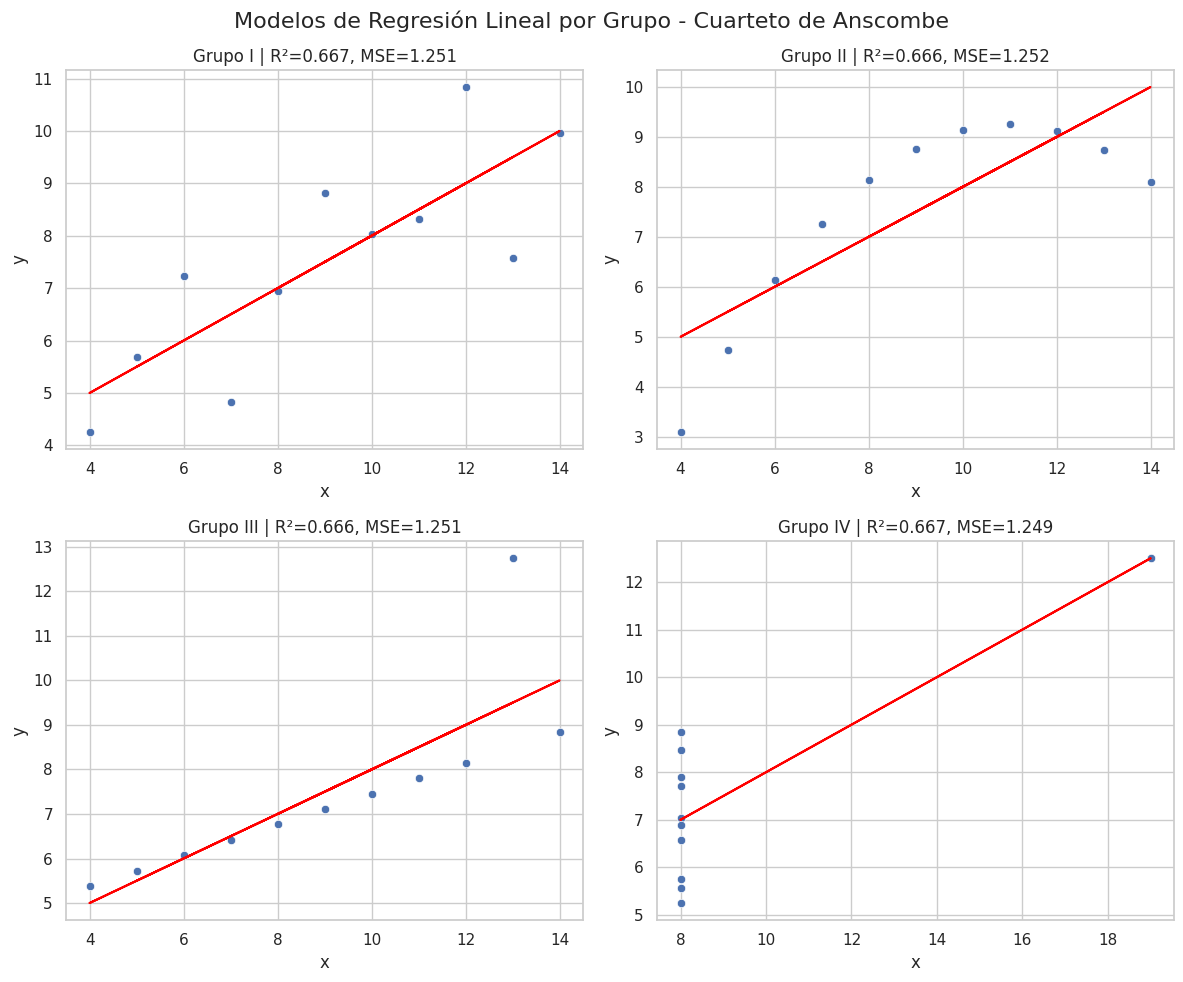

In [ ]:
# Crear figura
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Guardar resultados
resultados = []

# Recorrer cada grupo
for i, group in enumerate(sorted(data['dataset'].unique())):
    subset = data[data['dataset'] == group]
    x = subset['x'].values.reshape(-1, 1)
    y = subset['y'].values

    # Modelo lineal
    model = LinearRegression()
    model.fit(x, y)

    # Predicciones
    y_pred = model.predict(x)

    # Métricas
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Guardar resultados
    resultados.append({
        'grupo': group,
        'coeficiente': model.coef_[0],
        'intercepto': model.intercept_,
        'MSE': mse,
        'R2': r2
    })

    # Graficar
    ax = axes[i]
    sns.scatterplot(x=subset['x'], y=subset['y'], ax=ax)
    ax.plot(subset['x'], y_pred, color='red')
    ax.set_title(f'Grupo {group} | R²={r2:.3f}, MSE={mse:.3f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.suptitle('Modelos de Regresión Lineal por Grupo - Cuarteto de Anscombe', fontsize=16)
plt.tight_layout()
plt.show()


**Respuesta**: Podemos observar de los gráficos que aunque los R² y MSE coincidan, el comportamiento subyacente de los datos puede ser radicalmente diferente.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

**Respuesta:** Para el Grupo I se puede observar que el modelo lineal se ajusta bien a los datos y es acorde al gráfico. No obstante, para el Grupo II lo mejor es aplicar un modelo cuadrático, mientras que para el Grupo III una forma por medio del modelo robusto (RANSAC) que reduce el impacto del outlier.

In [ ]:
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Grupo III – usar regresión robusta (RANSAC)
grupo_3 = data[data['dataset'] == 'III']
X3 = grupo_3['x'].values.reshape(-1, 1)
y3 = grupo_3['y'].values

ransac = RANSACRegressor(LinearRegression())
ransac.fit(X3, y3)
y3_pred = ransac.predict(X3)
r2_3 = r2_score(y3, y3_pred)
mse_3 = mean_squared_error(y3, y3_pred)

# Grupo II – usar modelo cuadrático
grupo_2 = data[data['dataset'] == 'II']
X2 = grupo_2['x'].values.reshape(-1, 1)
y2 = grupo_2['y'].values

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X2, y2)
y2_pred = poly_model.predict(X2)
r2_2 = r2_score(y2, y2_pred)
mse_2 = mean_squared_error(y2, y2_pred)

# Mostrar resultados mejorados
print(f"Grupo II (cuadrático): R² = {r2_2:.3f}, MSE = {mse_2:.3f}")
print(f"Grupo III (robusto):   R² = {r2_3:.3f}, MSE = {mse_3:.3f}")


Grupo II (cuadrático): R² = 1.000, MSE = 0.000
Grupo III (robusto):   R² = 0.563, MSE = 1.638
